<img src="Figures/top_ML.png" alt="Drawing" style="width: 1000px;"/>

# EJERCICIO RESUELTO
# Aprendizaje supervisado: Clasificación.

## *Clasificación binaria de precios de electricidad en el Mercado Diario*

**Objetivo:** Imaginando que estamos a medioados de 2020, predecir en qué horas el precio de la electricidad en el Mercado Diario será elevado, siendo la **clase 0** para valores menores a 40 €, y **clase 1** para valores mayores a 40 €.  Se utilizará el contexto y datos históricos del **2020** de la variable target que queremos clasificar y de otros atributos (features) que pueden ayudar a predecir modelo.


### Antes de empezar:

* En el archivo **S4-data-precios.xlsx** se encuentra el conjunto de datos de entrada de este ejemplo (atributos + etiqueta). 
* Datos del 2 de enero 2020 al 26 de junio de 2020.


## **1. Importar librerías y datos**


In [1]:
# Importamos las librerías
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Cargamos el conjunto de datos de entrada
dataset = pd.read_excel('Data/S4-data-precios.xlsx')

## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. ¿Están balanceadas las etiquetas? 
4. Resumen estadístico del conjunto de datos de entrada.

**1. ¿Cuántos datos hay?**  
Tenemos 4223 filas y 14 columnas

**¿Cuántos atributos hay en los datos?** 
Hay 13 posibles "features" y 1 columna que será el "target" o "etiqueta" (lo que queremos predecir). 

In [2]:
# Filasxcolumnas de los datos
dataset.shape

(4223, 14)

In [3]:
# Observa las primeras 5 filas de los datos
dataset.head()

hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0     0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1     1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2     2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3     3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4     4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   

   carbon  biomas  precio-elect-dia-anterior  MIBGAS-dia-anterior  \
0   430.0     270                      41.88                11.27   
1   430.0     243                      38.60                11.27   
2   417.0     362                      36.55                11.27   
3   387.0     369                      32.32                11.27   
4   387.0     413                      30.85                11.27   

                precio  
0  menor que  40 euros  
1  menor que  40 euros  
2  menor que  40 euros  
3  menor que  40 euros  
4  menor que  40 euros

**2. ¿Qué significan?** 
* ***[Hora, Día, Mes]*** Hora, día y mes de cada una de las observaciones. Son valores enteros *int64*.

* ***[Hidraul, Eolica, Ciclocomb, Cogener, Nuclear, Carbon, Biomas]*** se refiere a la energía programada horaria del programa PVP en el mercado diario por tipo de producción del día anterior.  Son valores reales *float*.

* ***[Demanda]*** es la totalidad de energía programada en el mercado diario eléctrico en España el día anterior.  Son valores reales *float*.

* ***[precio-elect-dia-anterior]*** precio de la electricidad el día anterior. Son valores reales *float*.

* ***[MIBGAS-dia-anterior]*** precio del gas natural el día anterior. Son valores reales *float*.

* ***[Precio]*** son las etiquetas de precio que queremos predecir. Son valores *string*. Tendremos que transformarlas en número. 




**[INFO]** El .dtypes nos ayuda a identificar qué columnas habrá que transformar ya que son de tipo string. También detecta las columnas de tipo datetime (fecha y hora). Como habíamos comentado en el punto anterior, la columna "precio" es de tipo object (es decir, string). 

In [4]:
# Formato de los datos .info()
dataset.dtypes

hora                           int64
dia                            int64
mes                            int64
hidraul                      float64
eolica                       float64
demanda                      float64
ciclocomb                    float64
cogener                      float64
nuclear                      float64
carbon                       float64
biomas                         int64
precio-elect-dia-anterior    float64
MIBGAS-dia-anterior          float64
precio                        object
dtype: object

**3. ¿Falta algún dato? De ser así, indica cuántos y en que atributo** 

Faltan datos en las columnas *demanda* y *carbón*. Por lo tanto, deberemos de imputarle un valor a estas celdas o eliminar toda la fila (incluyendo el resto de columnas). 



In [5]:
# Comprobar si falta algún dato y en qué atributo
dataset.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
precio                       0
dtype: int64

**4. ¿Están balanceadas las etiquetas?** 

Las etiquetas no están balanceadas. Si los resultados de train y test no fueran satisfactorios, se podría utilizar alguna de las tácticas para balancear las clases (over-sampling, under-sampling). En este caso, la mejor opción sería oversampling de la clase minoritaria, ya que no hay muchas muestras disponibles. 

menor que  40 euros    3507
mayor que  40 euros     716
Name: precio, dtype: int64


<AxesSubplot:ylabel='precio'>

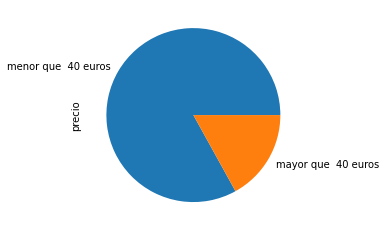

In [6]:
# Comprobar si las etiquetas están desvalanceadas
balance_clases = dataset['precio'].value_counts()
print(balance_clases)

# Gráfico del balance de clases
balance_clases.plot.pie()

**5. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [7]:
# Datos estadísticos de cada uno de los atributos
dataset.describe()

hora          dia          mes      hidraul        eolica  \
count  4223.000000  4223.000000  4223.000000  4223.000000   4223.000000   
mean     11.502250    15.411556     3.443287  3090.683495   6142.901373   
std       6.922282     8.598094     1.674775  1398.795645   3488.275912   
min       0.000000     1.000000     1.000000   856.600000    614.400000   
25%       6.000000     8.000000     2.000000  1924.150000   3447.650000   
50%      12.000000    15.000000     3.000000  2760.400000   5394.900000   
75%      17.500000    23.000000     5.000000  4126.450000   8229.350000   
max      23.000000    31.000000     6.000000  7411.900000  18996.300000   

            demanda    ciclocomb      cogener      nuclear       carbon  \
count   4220.000000  4223.000000  4223.000000  4223.000000  4220.000000   
mean   20223.538578  2337.097135  3059.788942  6019.210466   674.060308   
std     3945.242127  1488.503359   282.994453  1212.068728   444.206117   
min        0.000000   460.000000  1825.500000  3410.200000     0.000000   
25%    17123.000000  1255.600000  2909.150000  4886.200000   413.000000   
50%    20094.500000  1962.600000  3089.300000  6730.500000   530.000000   
75%    22871.725000  2893.350000  3238.150000  7089.500000   973.000000   
max    35458.900000  9078.400000  3696.800000  7100.500000  2065.000000   

            biomas  precio-elect-dia-anterior  MIBGAS-dia-anterior  
count  4223.000000                4223.000000          4223.000000  
mean    374.144684                  28.813694             8.288518  
std     102.061931                  10.929161             2.347374  
min     197.000000                   1.020000             4.170000  
25%     287.000000                  21.080000             6.040000  
50%     373.000000                  28.410000             8.180000  
75%     462.000000                  36.670000             9.975000  
max     551.000000                  62.480000            14.480000

## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.
Aquí observamos que la generación eólica sigue la distribución de Weibull. Tambíen se aprecia en la generación nuclear cuando se prduce la parada de alguna central nuclear debido a mantenimiento o cambio de combustible. Sin embargo, no aparece el histograma de la etiqueta (precio), ya que se trata de un string, no número. 

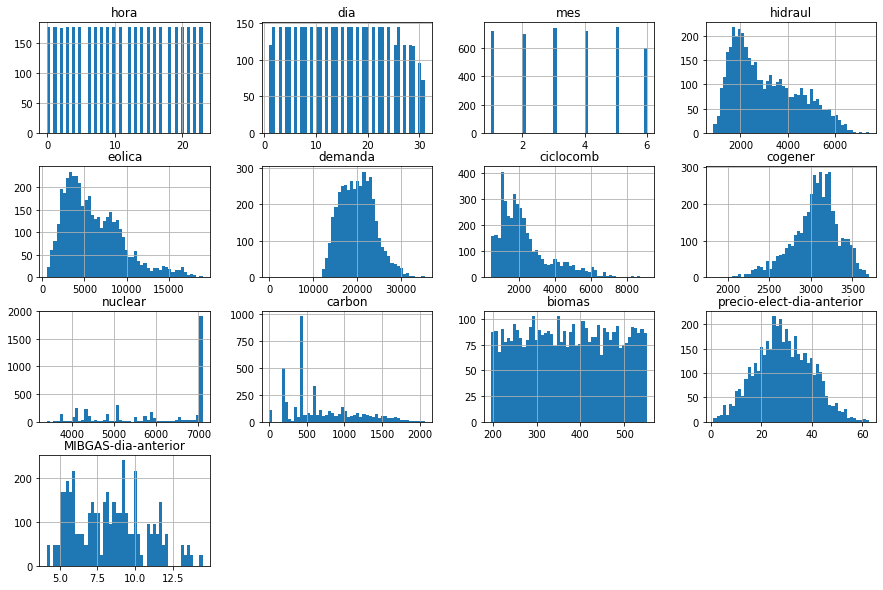

In [8]:
histograma = dataset.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15, 10))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

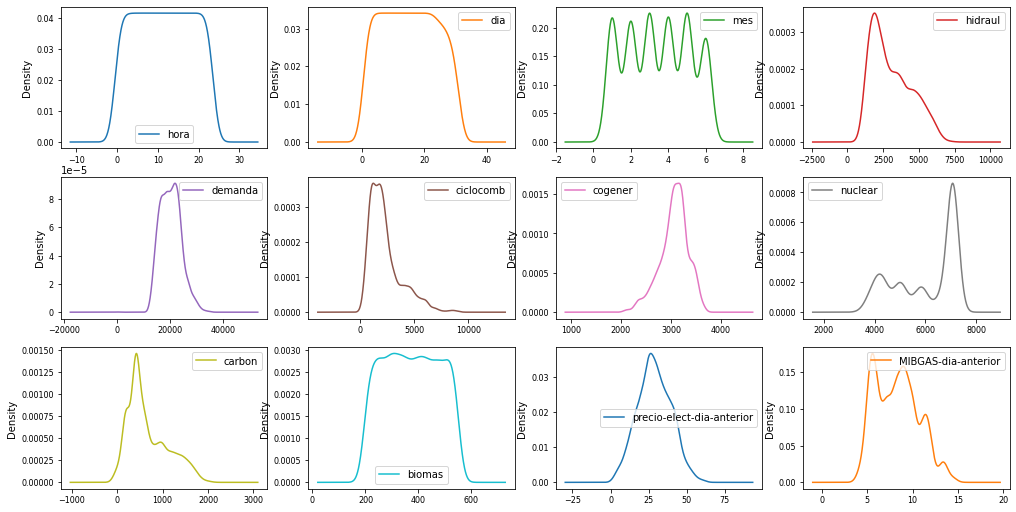

In [9]:
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Que atributo llama la atención por sus valores atípicos?**. 
La eólica y el ciclo combinado. Podría pensarse que estos outliers deberían de ser eliminados, pero es todo lo contrario: para días con una generación eólica inusualmente alta, esto será un indicativo muy importante a la hora de predecir el precio, ya que probablemente sea bajo. Sucede al contrario en la generación de ciclo combinado: un valor inusualmente alto de generación de ciclo combinado, indicará probablemente unos altos precios. 

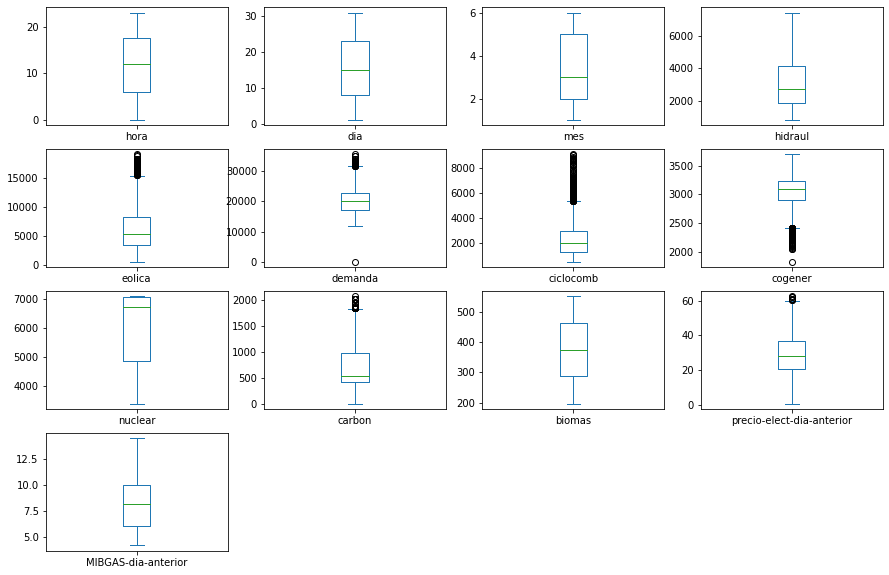

In [10]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

<div class="alert alert-success">

### **Selección de características (features selection)** 
Es el proceso utilizado para seleccionar las variables de entrada (features) que son más importantes para la tarea de aprendizaje automático supervisado.

En una tarea de Aprendizaje Supervisado, el objetivo es predecir una variable de salida (target). En algunos casos, dispones de pocas variables de entrada para trabajar, pero a veces, tienes acceso a una gran cantidad de variables de entrada potenciales. En este caso, puede ser perjudicial utilizar todas estas variables de entrada en el modelo. Aquí es donde entra en juego la selección de características.

**Formas de llevar a cabo la selección de características**:
* **1. Métodos de filtro: Matriz de correlación**

Calcular y visualizar la matriz de correlación es una manera de seleccionar variables de entradas que estén relacionadas con la etiqueta o variable a predecir. La matriz de correlación es una tabla que muestra los coeficientes de correlación de diferentes variables. La matriz representa la correlación entre todos los posibles pares de valores de una tabla y es una poderosa herramienta para resumir un gran conjunto de datos e identificar y visualizar patrones en los datos dados. 

Si el rango de correlación es de [-1, 1], variables de entrada con valores cercanos a -1 y a 1 con el target, son un buen indicativo. Valores cercano a 0, indican que no hay ninguna correlación o patrón entre la variable de entrada y el target, por lo que podría ser descartada. 

Las features (variables de entrada/ características) con alta correlación entre ellas son linealmente dependientes y, por tanto, tienen casi el mismo efecto sobre la variable dependiente (target). Por lo tanto, cuando dos features tienen una alta correlación, podemos descartar una de las dos características.


* **2. Métodos Wrapper: Forward selection and Backward elimination**

La Eliminación Recursiva justa un modelo que comienza con todas las variables de entrada, y luego elimina iterativamente las que tienen la relación más débil con la salida hasta que se alcanza el número deseado de características. La eliminación hacia delante (Forward) empieza con una variable de entrada y va agregando todas. 

    
</div> 




<img src="Figures/feature_selection.png" alt="Drawing" width="700"/>


**4. Matriz de correlación** 
Utilizamos el método de Spearman para evaluar la relación monótona entre dos variables contínuas. 

Comparación entre método de [Pearson y Spearman]

[Pearson y Spearman]: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 
La variable biomass no tiene ningún tipo de correlación con ningún atributo, y el valor es 0 en todos ellos. Esta variable ha sido creada con valores random, por lo que tiene sentido que la correlación sea 0. Se puede por tanto eliminar esta variable de entrada. 

<div class="alert alert-success">

### **Diferencias entre Pearson y Spearman:** 
    
Tanto Pearson como Spearman se utilizan para medir la correlación, pero la diferencia entre ellos radica en el tipo de análisis que queremos.

* Correlación de Pearson: La correlación de Pearson evalúa la **relación lineal** entre dos variables continuas.

* Correlación de Spearman: La correlación de Spearman evalúa la **relación monótona**. 

</div> 


<img src="Figures/correlation.png" alt="Drawing" width="700"/>

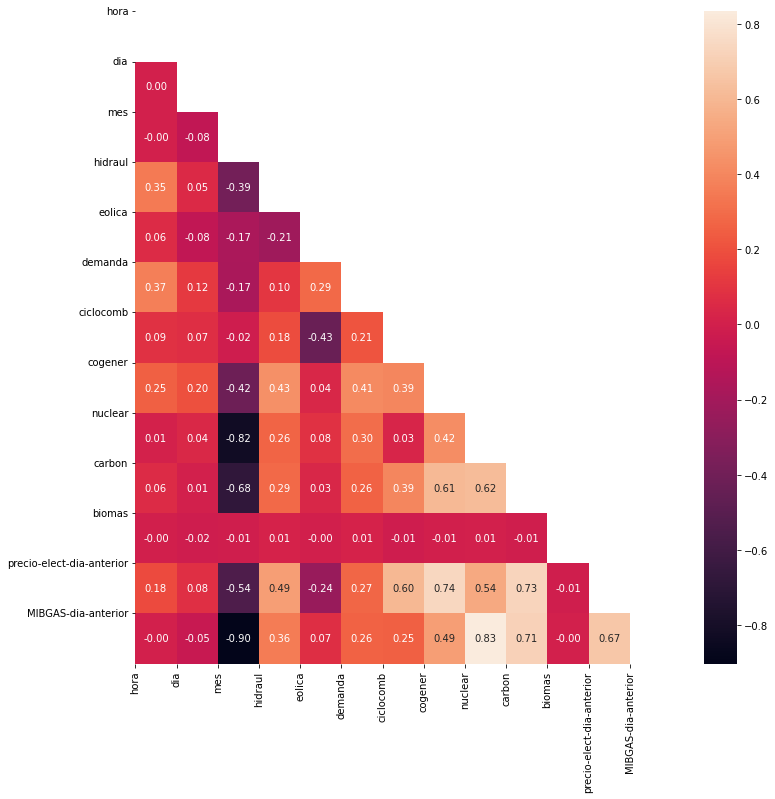

In [11]:
# Otra librería de visualización de datos
import seaborn as sns

# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 


# Quitar valores repetidos
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

No podemos ver la correlación con el precio, debemos pasarlo a numérico [LabelEncoder] 

[LabelEncoder]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

<div class="alert alert-success">

### Label Encoder vs One Hot Encoder
Cuando trabajamos con Python y Sklearn, necesitamos que todos los datos que vamos a modelizar sean númericos. Si tenemos variables de tipo string necesitamos previamente transformarlas a números. La forma más rápida para realizar esta tarea es emplear preprocesing de sklearn *LabelEncoder* o *OnehotEncoding*. 
Hay que tener cuidado con el orden de las codificaciones porque es un orden léxico-gráfico, no va por orden de aparición.
    
Leer más sobre esto: [TowardsDataScience]
    
[TowardsDataScience]: https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
</div> 

<img src="Figures/label-hot.jfif" alt="Drawing" width="700"/>

In [12]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(dataset['precio'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

dataset['precio'] = lab_encoder.transform(dataset['precio'])
print(dataset)

['mayor que  40 euros' 'menor que  40 euros']
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

     

In [13]:
# replace column values 0: menor que 40; 1: mayor que 40. 

dataset['precio'] = dataset['precio'].map({0:1, 1:0})


In [14]:
dataset

hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

      carbon  biomas  precio-elect-dia-anterior  MIBGAS-dia-anterior  precio  
0      430.0     270                      41.88                11.27       0  
1      430.0     243                      38.60                11.27       0  
2      417.0     362                      36.55                11.27       0  
3      387.0     369                      32.32                11.27       0  
4      387.0     413                      30.85                11.27       0  
...      ...     ...                        ...                  ...     ...  
4218   946.0     365                      40.44                 7.28       0  
4219   946.0     453                      41.23                 7.28       1  
4220   946.0     362                      40.24                 7.28       0  
4221   946.0     424                      40.10                 7.28       1  
4222   946.0     358                      38.63                 7.28       0  

[4223 rows x 14 columns]

**Creamos nuevas variables a partir de las existentes**

In [15]:
dataset['ratio-precioelectr-gas'] = dataset['precio-elect-dia-anterior']/dataset['MIBGAS-dia-anterior']
dataset.head()

hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0     0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1     1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2     2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3     3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4     4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   

   carbon  biomas  precio-elect-dia-anterior  MIBGAS-dia-anterior  precio  \
0   430.0     270                      41.88                11.27       0   
1   430.0     243                      38.60                11.27       0   
2   417.0     362                      36.55                11.27       0   
3   387.0     369                      32.32                11.27       0   
4   387.0     413                      30.85                11.27       0   

   ratio-precioelectr-gas  
0                3.716060  
1                3.425022  
2                3.243123  
3                2.867791  
4                2.737356

#### Volvemos a mostrar la matriz de correlación con el valor del precio [1 (muy alto), 0 (normal)]


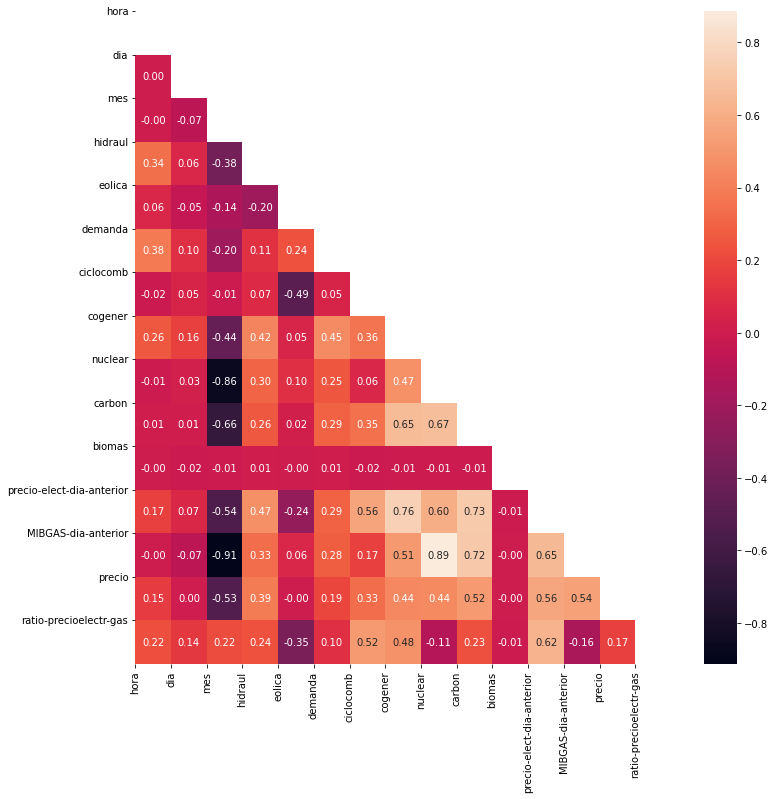

In [16]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='spearman') 


# Quitar valores repetidos
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

El siguiente plot muestra la distribución de las etiquetas "precio" en cada una de las variables de entrada. 

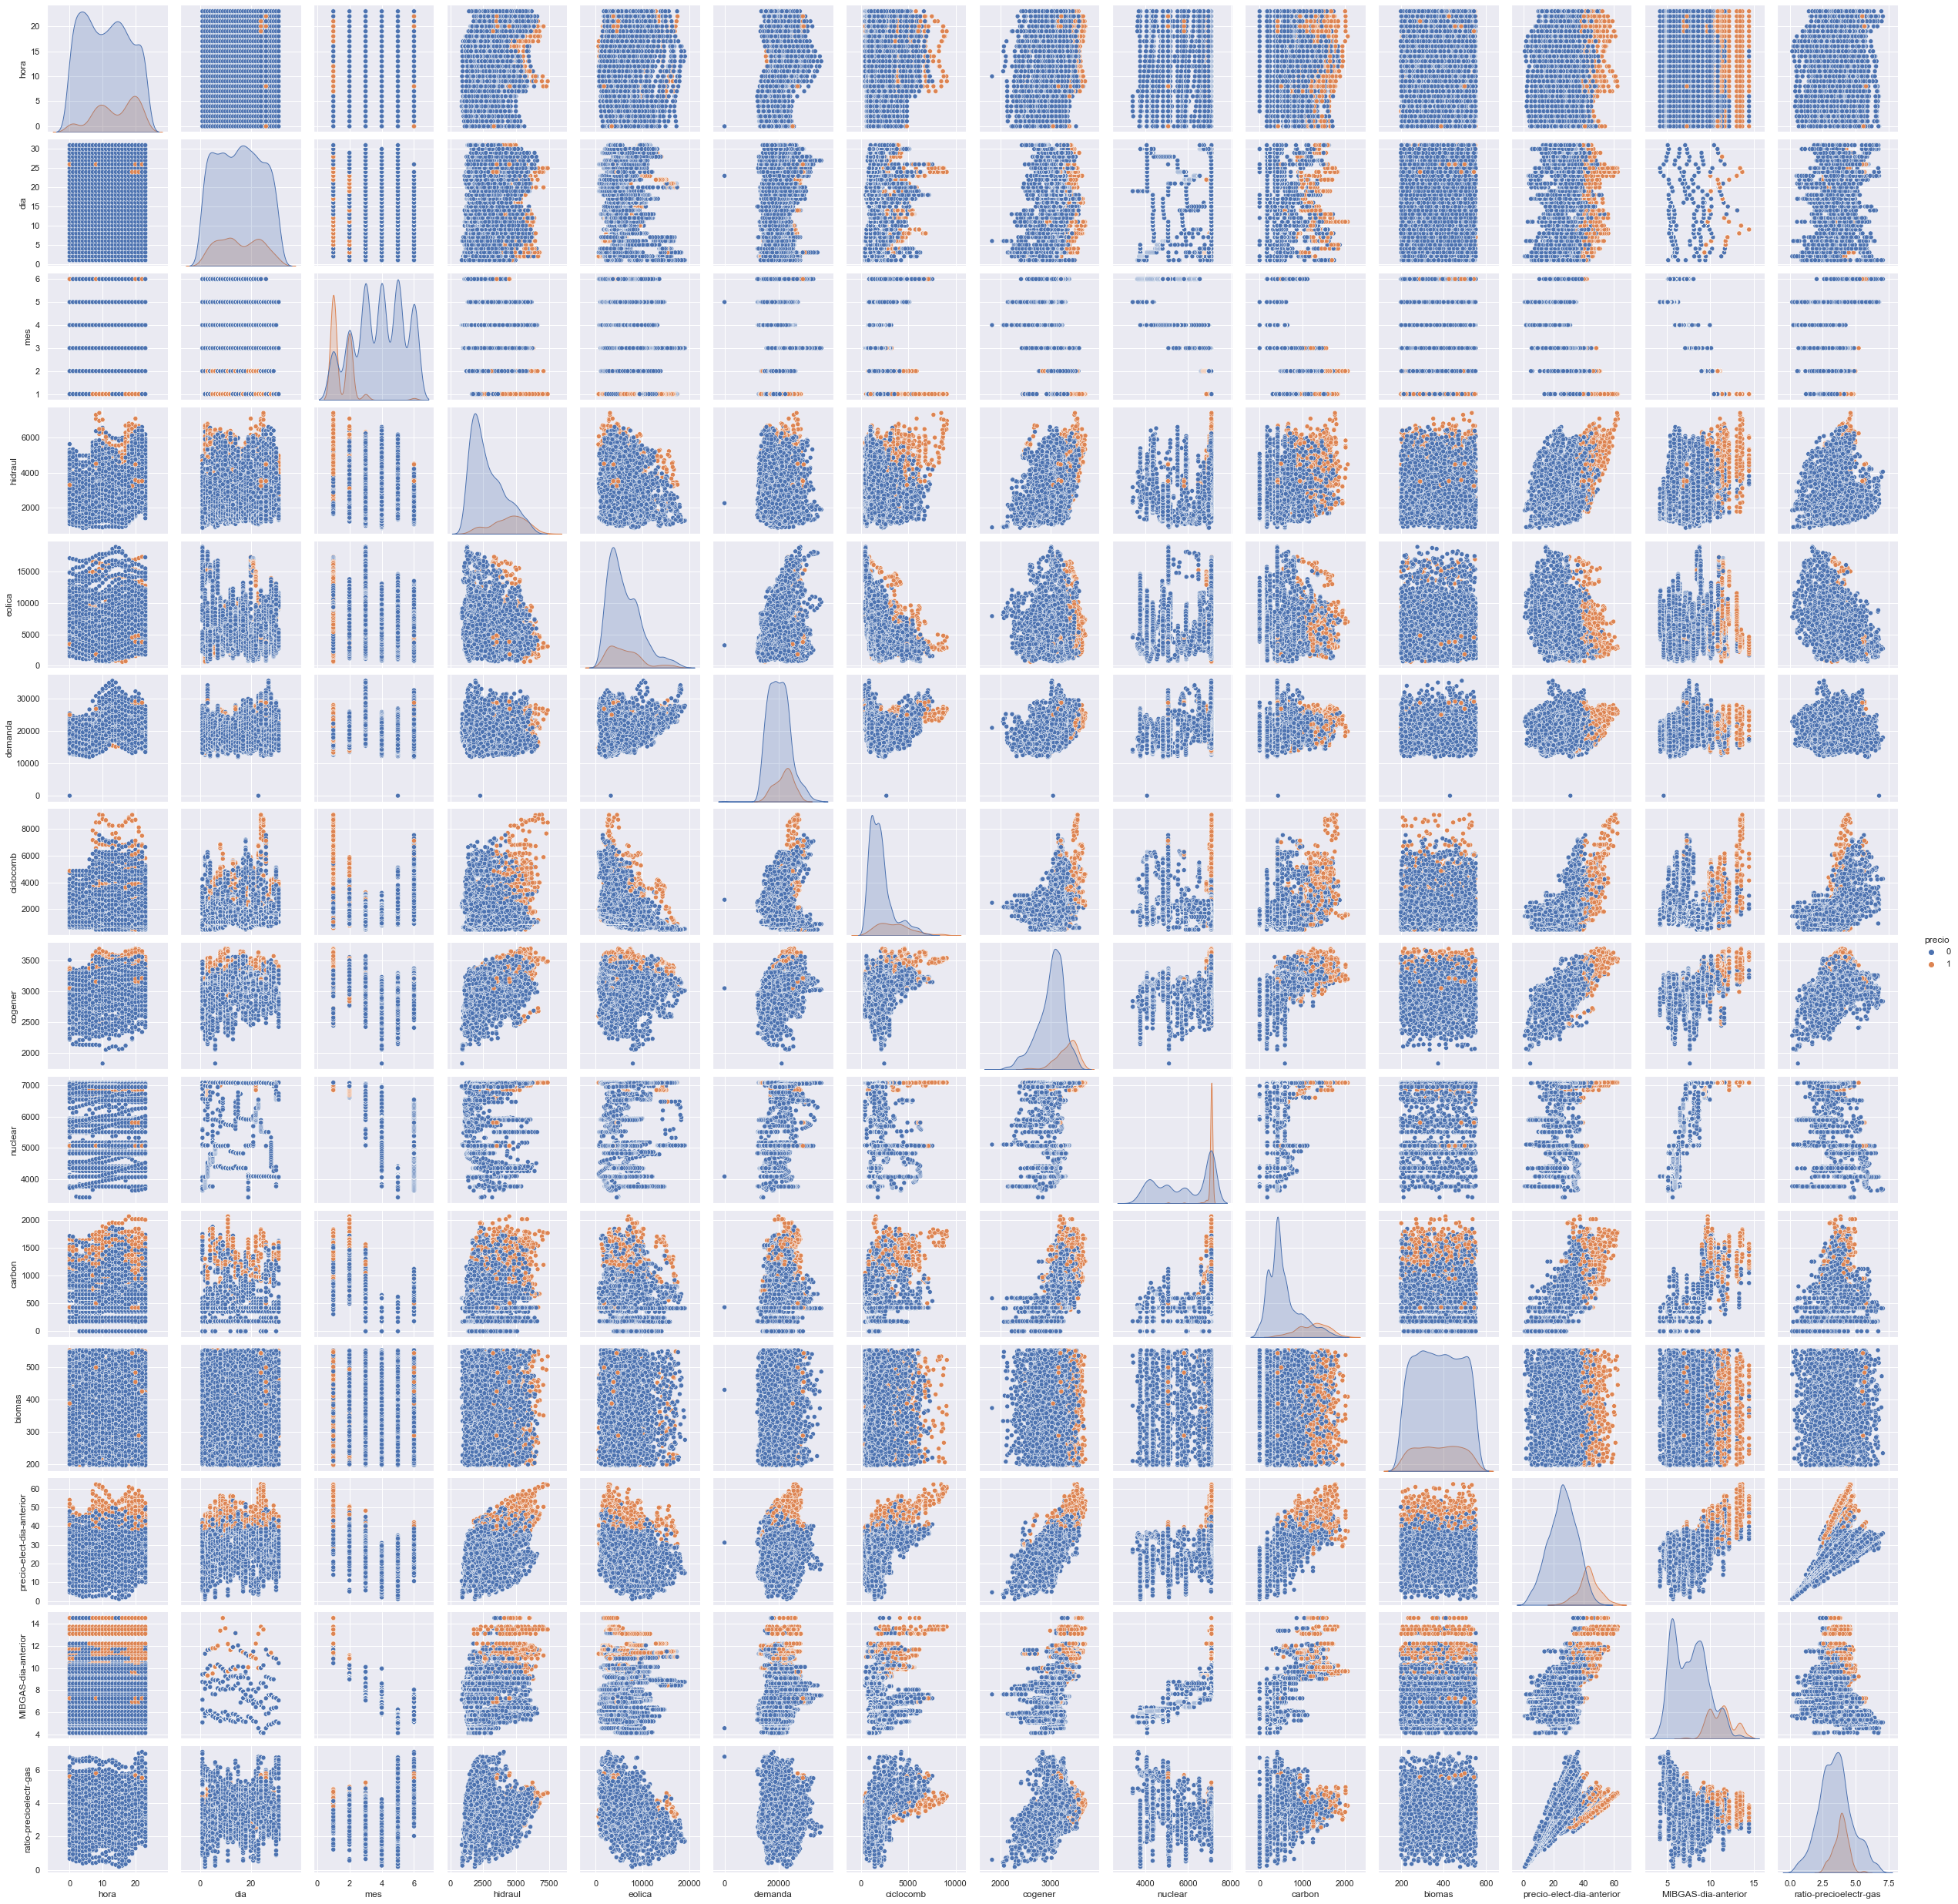

In [17]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})

sns.pairplot(dataset, hue="precio")

## *4. Preparar los datos*

1. Missing data
2. Data cleaning (eliminar outliers).
3. LabelEncoding (ya lo hemos hecho)
4. Feature engineering
5. Transformación.

Primero, divido los datos en:

* **Features/características/atributos/variables de entrada**: **X**
* **Target/etiquetas**: y 

<img src="Figures/X_y.png" alt="Drawing" style="width: 700px;"/>

In [18]:
# Atributos X (features); etiquetas y (target)
X = dataset.drop(['precio'], axis=1) 
y = dataset['precio']
X

hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

      carbon  biomas  precio-elect-dia-anterior  MIBGAS-dia-anterior  \
0      430.0     270                      41.88                11.27   
1      430.0     243                      38.60                11.27   
2      417.0     362                      36.55                11.27   
3      387.0     369                      32.32                11.27   
4      387.0     413                      30.85                11.27   
...      ...     ...                        ...                  ...   
4218   946.0     365                      40.44                 7.28   
4219   946.0     453                      41.23                 7.28   
4220   946.0     362                      40.24                 7.28   
4221   946.0     424                      40.10                 7.28   
4222   946.0     358                      38.63                 7.28   

      ratio-precioelectr-gas  
0                   3.716060  
1                   3.425022  
2                   3.243123  
3                   2.867791  
4                   2.737356  
...                      ...  
4218                5.554945  
4219                5.663462  
4220                5.527473  
4221                5.508242  
4222                5.306319  

[4223 rows x 14 columns]

In [19]:
# Imprimo el target "precio"
y

0       0
1       0
2       0
3       0
4       0
       ..
4218    0
4219    1
4220    0
4221    1
4222    0
Name: precio, Length: 4223, dtype: int64

**Missing data**

Comprobar si exisiten Nan en los datos de entrada. 

- Se utiliza el método [fillna] de Pandas.

- Más información acerca de cómo imputar valores con [Scikit Learn]

[Scikit Learn]: https://scikit-learn.org/stable/modules/impute.html
[fillna]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html





In [20]:
# Comprobar si faltan datos en los atributos
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
ratio-precioelectr-gas       0
dtype: int64

In [21]:
# Relleno los missing values de cada atributo con el valor anterior del atributo. 
X["demanda"].fillna(method='ffill', inplace=True)
X["carbon"].interpolate(method='linear', inplace=True)

In [22]:
# Comprobar si faltan datos en el target
y.isna().sum()

0

In [23]:
# Comprueba que no falta ningún valor
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      0
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       0
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
ratio-precioelectr-gas       0
dtype: int64

**3. Feature engineering**

Utilizando la matriz de correlación, eliminar los atributos con una correlacion cercana a 0 con la etiqueta **"precio"**. 

* **¿Qué atributo(s) se elimana(n)?** 

In [24]:
# Elimino el atributo
X.drop(['biomas', 'dia', 'eolica', 'mes'], axis='columns', inplace=True)
X

hora  hidraul  demanda  ciclocomb  cogener  nuclear  carbon  \
0        0   5221.1  13290.5     2500.5   2493.8   7093.6   430.0   
1        1   4928.5  12720.1     2411.5   2447.8   7091.6   430.0   
2        2   4860.3  12558.6     2307.5   2446.6   7092.6   417.0   
3        3   4980.8  12837.5     2307.5   2436.7   7092.6   387.0   
4        4   4984.3  13100.9     2374.2   2448.3   7094.6   387.0   
...    ...      ...      ...        ...      ...      ...     ...   
4218    19   4230.5  29267.6     7090.4   3200.0   5061.4   946.0   
4219    20   4479.3  29025.5     7130.7   3203.2   5063.4   946.0   
4220    21   3800.5  29266.4     6764.1   3217.7   5062.4   946.0   
4221    22   3529.7  28711.2     6745.1   3215.0   5064.4   946.0   
4222    23   2650.6  26581.4     6650.9   3209.0   5065.4   946.0   

      precio-elect-dia-anterior  MIBGAS-dia-anterior  ratio-precioelectr-gas  
0                         41.88                11.27                3.716060  
1                         38.60                11.27                3.425022  
2                         36.55                11.27                3.243123  
3                         32.32                11.27                2.867791  
4                         30.85                11.27                2.737356  
...                         ...                  ...                     ...  
4218                      40.44                 7.28                5.554945  
4219                      41.23                 7.28                5.663462  
4220                      40.24                 7.28                5.527473  
4221                      40.10                 7.28                5.508242  
4222                      38.63                 7.28                5.306319  

[4223 rows x 10 columns]

## *5. Dividir los datos*


<img src="Figures/train-val-test.png" alt="Drawing" style="width: 20px;"/>
 


<div class="alert alert-success">

### ¿En qué proporción dividir el conjunto de datos?

A menudo se pregunta en qué proporción hay que dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba.

Esta decisión depende principalmente de dos cosas: i) el número total de muestras de sus datos, ii) del modelo que esté entrenando.

* Algunos modelos necesitan un número considerable de datos para entrenarse, por lo que en este caso se optimizarían los conjuntos de entrenamiento más amplios.
* Los modelos con muy pocos hiperparámetros serán fáciles de validar y ajustar, por lo que probablemente pueda reducir el tamaño de su conjunto de validación.
* Pero si su modelo tiene muchos hiperparámetros, querrá tener también un conjunto de validación significativo.
    
Como orientación, 65% train, 15% validación, 20% test.
    
</div> 


In [25]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size)

**4. Transformación (escalado)**. 

* **Escalar los datos utilizando el método de *MinMaxScaler()* dentro del rango [0,1].**

<div class="alert alert-success">
    
Hemos hablado previamente de que varios algoritmos de aprendizaje automático son sensibles cuando los datos no están escalados. Hay varios algoritmos de aprendizaje automático que se basan totalmente en el mapeo de la distancia entre los puntos de datos. COmo por ejemplo:
    
* SVM
* KNN
* K-means (unsupervised)
* Principal Component Analysis (PCA) (Unsupervised)
* Redes Neuronales (MLP)

RandonForest, CART, Gradient Boosted Decision Trees no necesitan de escalado. 

Las técnicas más comunes de escalado de características son la **normalización** y la **estandarización**.

* La normalización se utiliza cuando queremos acotar nuestros valores entre dos números, normalmente, entre [0,1] o [-1,1].
* La estandarización transforma los datos para que tengan una media cero y una varianza de 1. 

    
Más [información]
    
[información]: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
    
<img src="Figures/scaling.png" alt="Drawing" width="700"/>
    
</div> 

<div class="alert alert-success">

### Importante!!

* Divide los datos (train, validation, test)
* Escala los datos de entreno
* Escala los datos de test/validación con los parámetros de entreno. 

</div> 

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = X_train.copy()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train))  # FIT() + TRANSFORM()
X_train_sc.columns = X_train.columns
X_train_sc.head()

hora   hidraul   demanda  ciclocomb   cogener   nuclear    carbon  \
0  0.956522  0.328876  0.194461   0.159751  0.600000  0.384982  0.181141   
1  0.130435  0.148753  0.388961   0.109487  0.478533  0.997507  0.173697   
2  0.521739  0.179288  0.300523   0.113269  0.381824  0.252662  0.089330   
3  0.869565  0.118845  0.334195   0.237306  0.658602  0.375173  0.204963   
4  0.695652  0.561038  0.248592   0.066590  0.472328  0.672710  0.209926   

   precio-elect-dia-anterior  MIBGAS-dia-anterior  ratio-precioelectr-gas  
0                   0.533192             0.096993                0.922693  
1                   0.382525             0.433560                0.386097  
2                   0.174097             0.127061                0.284424  
3                   0.369671             0.146460                0.580673  
4                   0.105434             0.268671                0.130849

## *6. Construcción y evaluación de modelos*

* Seleccionamos **[balanced_accuracy]** como métrica de evaluación. 
* Métricas de evaluación disponibles en [Scikit-Learn].


[Scikit-Learn]: https://scikit-learn.org/stable/modules/model_evaluation.html

[balanced_accuracy]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* Recordar utilizar siempre el mismo random_state para poder comparar resultados. 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

num_folds = 5
error_metrics = {'balanced_accuracy'}
models = { ('LR', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
           ('RF', RandomForestClassifier())
         }

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


* **¿Cuál obtiene mejores resultados?** 
* **¿Qué balanced_accuracy obtiene?** El Random Forest obtiene mejores resultados, con un balance accuracy superior a 0.85

Métrica de evaluación:  balanced_accuracy
Modelo  RF
Modelo  LR
Modelo  KNN
[('RF', 0.8453697581361597, 0.02749233534587458), ('LR', 0.8176749287893156, 0.016557056633176005), ('KNN', 0.7706996416554917, 0.036122968428783396)]


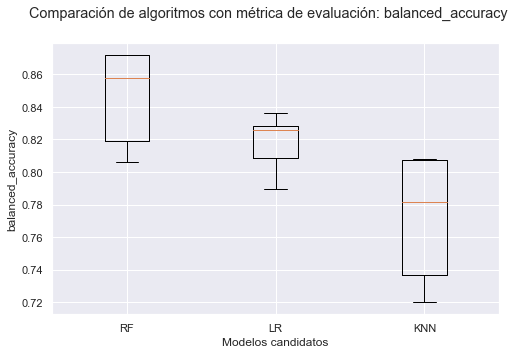

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    sns.set(rc={'figure.figsize':(8,5)})
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


## *7. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:
[RandomForest] parámeteros

* Métrica para optimizar: *balanced_accuracy*
* Definir los rangos de los parámetros de búsqueda: *params*
* Entrenar con los datos de validación: *X_val*
* Escalar los valores de validación (aunque en RF no sería necesario)

[RandomForest]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [29]:

from sklearn.model_selection import TimeSeriesSplit

X_val_sc = scaler.transform(X_val)  # Aquí aplico solo el .transform(), no el .fit() -- para usar los parámetros de train. 

# RF
modelo = RandomForestClassifier()
hyperparams = {
     'n_estimators': [100, 500, 800], #default=100
     'min_samples_split': [2, 4], #default=2
     'bootstrap': [True, False],  #default=True
 }

scoring='balanced_accuracy'
cross_validation = TimeSeriesSplit(n_splits=10)
my_cv = cross_validation.split(X_val_sc, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=hyperparams, scoring=scoring, cv=my_cv, verbose=2) 
gsearch.fit(X_val_sc, y_val)

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END bootstrap=True,

[CV] END bootstrap=False, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=800; total time=

## *8. Evaluación final del modelo*



Métricas de evaluación:
  * 1. Matriz de confusión
  * 2. Coeficiente de Matthews (MCC)

    
**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [30]:
# modelo_final = RandomForestClassifier(max_features='sqrt', min_samples_split=5,  n_estimators=400, class_weight={0:1,1:5})
modelo_final =RandomForestClassifier(bootstrap=False, min_samples_split=2, n_estimators= 800)
modelo_final.fit(X_train_sc,y_train)  # Se entrena al modelo RF con los hiperparámetros seleccionados.

# Escalo el test data
X_test_sc = scaler.transform(X_test)

# Realizo las predicciones
y_predict = modelo_final.predict(X_test_sc)  # Se calculan las predicciones


**¿Qué atributos tienen más peso en el modelo?** 

Para el caso del Random Forest, el atributo más importante para predecir los precios es la generación de carbón, seguido de la generación hidráulica y del mes del año. En la matriz de correlación, el atributo carbón era el que tenía más correlación con la variable clase. 

In [31]:
# Imprimir la importancia de cada atributo (Solo si Random forest es seleccionado)
importancia_atributos = gsearch.best_estimator_.feature_importances_

std = np.std([tree.feature_importances_ for tree in gsearch.best_estimator_.estimators_],axis=0)
indices = np.argsort(importancia_atributos)[::-1]

# Print the feature ranking
print("Ranking de importancia de atributos:")
for f in range(X_train_sc.shape[1]):
    print("%d. Atributo %d (%f)" % (f + 1, indices[f], importancia_atributos[indices[f]]))


Ranking de importancia de atributos:
1. Atributo 7 (0.275167)
2. Atributo 6 (0.168447)
3. Atributo 8 (0.124148)
4. Atributo 1 (0.079253)
5. Atributo 4 (0.072259)
6. Atributo 5 (0.066803)
7. Atributo 3 (0.065153)
8. Atributo 0 (0.056537)
9. Atributo 9 (0.046510)
10. Atributo 2 (0.045722)


In [32]:
# Instalamos la librería shap para realizar un gráfico
!pip install shap

In [33]:
# Añado el nombre a las columnas del X_test para representarlas en el gráfico. Para ello, transformo el numpy a pandas

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X.columns

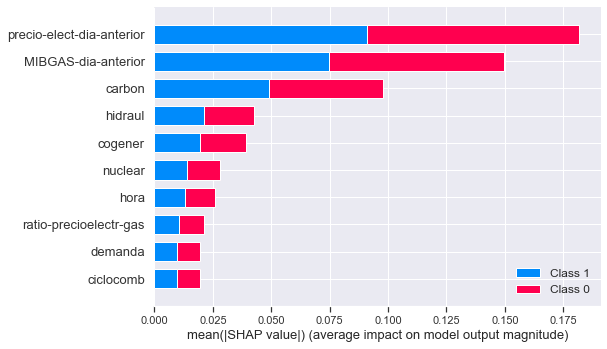

In [34]:
import shap

explainer = shap.TreeExplainer(modelo_final)
shap_values = explainer.shap_values(X_test_sc)

shap.summary_plot(shap_values, X_test_sc, plot_type="bar")

## Métricas de Evaluación

**1. Matriz de confusión**

La matriz de confusión es una herramienta muy útil para valorar cómo de bueno es un modelo clasificación basado en aprendizaje automático. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error. 

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       681
           1       0.89      0.77      0.83       164

    accuracy                           0.94       845
   macro avg       0.92      0.88      0.89       845
weighted avg       0.94      0.94      0.94       845

[[665  16]
 [ 37 127]]


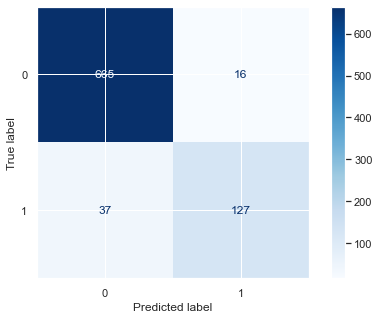

In [36]:
# Gráfico no normalizado de la martiz de confusión

disp = plot_confusion_matrix(modelo_final, X_test_sc, y_test,
                                 cmap=plt.cm.Blues, values_format = '')
sns.set(rc={'figure.figsize':(5,5)})

**2. Coeficiente de Matthews (MCC)**

El MCC utiliza coeficientes de correlación entre -1 y +1. 
* Coeficiente +1 representa una predicción perfecta
* Coeficiente 0 representa una predicción media aleatoria
* Coeficiente -1 representa una predicción inversa. 

In [37]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_predict)

0.7920239956126619

**3. Curva ROC / AUC**.

* Curva ROC: Curva de la tasa de verdaderos positivos frente a la tasa de falsos positivos con diferentes umbrales de clasificación.

* AUC: (Área bajo la curva): El área bajo la curva (AUC) ROC es la probabilidad de que un clasificador tenga más confianza en que un ejemplo positivo elegido al azar sea realmente positivo en relación con que un ejemplo negativo elegido al azar sea positivo.

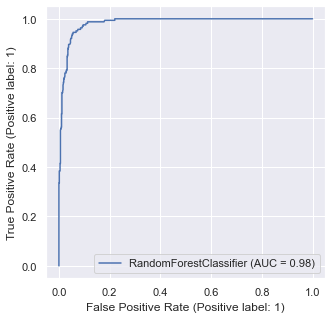

In [38]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc

plot_roc_curve(modelo_final, X_test_sc, y_test)
auc = roc_auc_score(y_test, y_predict)

### Guardamos el modelo

In [39]:
import joblib

# save the model to disk
filename = 'Data\modelo_final'
joblib.dump(modelo_final, filename)  # guardo el modelo
modelo_final

RandomForestClassifier(bootstrap=False, n_estimators=800)

**Cargamos el modelo**

[Joblib] nos permite guardar nuestro modelo ya entrenado para utilizarlo cuando lo necesitemos. 

[Joblib]: http://exponentis.es/persistencia-de-modelos-en-python-como-guardar-tu-modelo-entrenado-de-machine-learning

In [40]:

# load the model from disk
loaded_model = joblib.load(filename)

# Cargamos el conjunto de datos de entrada
dataset_prueba = pd.read_excel('Data/S4-precios-operacion.xlsx')
dataset_prueba



hora  hidraul  demanda  ciclocomb  cogener  nuclear  carbon  \
0      0   3309.8  24964.5     4861.9   3050.6   5068.2   432.0   
1      1   2758.7  23524.0     4860.6   3029.5   5068.2   431.0   
2      2   2409.6  22560.5     4865.9   3023.2   5068.2   423.0   
3      3   2140.1  21945.6     4868.7   3021.8   5068.2   423.0   
4      4   2012.6  21788.3     4871.1   3022.2   5069.2   423.0   
5      5   2344.0  22103.9     4869.1   3027.5   5070.2   423.0   
6      6   2661.8  23531.9     5724.8   3051.5   5069.2   423.0   
7      7   3230.2  25231.4     6147.2   3099.8   5070.2   423.0   
8      8   4516.6  26802.2     7006.5   3157.7   5070.2   504.5   
9      9   4181.7  29090.3     7547.8   3150.6   5069.2   543.6   
10    10   3345.2  30229.1     7292.8   3153.9   5069.2   705.9   
11    11   2995.0  30995.1     7076.5   3213.9   5068.2   779.4   
12    12   3209.3  31785.9     6977.0   3211.2   5067.2   887.8   
13    13   3057.7  32552.0     7096.3   3214.1   5066.2   883.0   
14    14   2054.3  31878.2     7033.3   3206.0   5065.2   928.0   
15    15   1567.3  30791.1     6760.0   3185.1   5065.2   928.0   
16    16   1347.7  30435.3     6647.8   3184.1   5065.2   993.0   
17    17   1821.0  30131.7     6704.8   3187.4   5063.2  1003.0   
18    18   3213.6  29671.4     6920.5   3189.8   5063.4   946.0   
19    19   4230.5  29267.6     7090.4   3200.0   5061.4   946.0   
20    20   4479.3  29025.5     7130.7   3203.2   5063.4   946.0   
21    21   3800.5  29266.4     6764.1   3217.7   5062.4   946.0   
22    22   3529.7  28711.2     6745.1   3215.0   5064.4   946.0   
23    23   2650.6  26581.4     6650.9   3209.0   5065.4   946.0   

    precio-elect-dia-anterior  MIBGAS-dia-anterior  ratio-precioelectr-gas  \
0                       40.75                 7.28                5.597527   
1                       40.10                 7.28                5.508242   
2                       39.41                 7.28                5.413462   
3                       38.99                 7.28                5.355769   
4                       38.63                 7.28                5.306319   
5                       39.41                 7.28                5.413462   
6                       40.01                 7.28                5.495879   
7                       40.73                 7.28                5.594780   
8                       42.09                 7.28                5.781593   
9                       40.98                 7.28                5.629121   
10                      39.75                 7.28                5.460165   
11                      39.24                 7.28                5.390110   
12                      40.10                 7.28                5.508242   
13                      39.98                 7.28                5.491758   
14                      38.25                 7.28                5.254121   
15                      36.00                 7.28                4.945055   
16                      34.76                 7.28                4.774725   
17                      37.06                 7.28                5.090659   
18                      39.55                 7.28                5.432692   
19                      40.44                 7.28                5.554945   
20                      41.23                 7.28                5.663462   
21                      40.24                 7.28                5.527473   
22                      40.10                 7.28                5.508242   
23                      38.63                 7.28                5.306319   

    precio  
0        1  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        1  
9        0  
10       0  
11       0  
12       0  
13       0  
14       0  
15       0  
16       0  
17       0  
18       0  
19       0  
20       1  
21       0  
22       1  
23       0

In [41]:
X_prueba_sc = scaler.transform(dataset_prueba.drop(['precio'], axis=1))
y_predict_prueba = modelo_final.predict(X_prueba_sc)  # Se calculan las predicciones
y_target = dataset_prueba['precio']

In [42]:
y_target
resultado = pd.DataFrame(y_target)
y_predict = pd.DataFrame(y_predict_prueba)
resultado['predicción'] = y_predict
resultado

precio  predicción
0        1           1
1        0           0
2        0           0
3        0           0
4        0           0
5        0           0
6        0           0
7        0           0
8        1           0
9        0           0
10       0           0
11       0           0
12       0           0
13       0           0
14       0           0
15       0           0
16       0           0
17       0           0
18       0           0
19       0           1
20       1           1
21       0           1
22       1           1
23       0           0

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_target, y_predict_prueba)
print(classification_report(y_target, y_predict_prueba))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.60      0.75      0.67         4

    accuracy                           0.88        24
   macro avg       0.77      0.82      0.79        24
weighted avg       0.89      0.88      0.88        24

[[18  2]
 [ 1  3]]


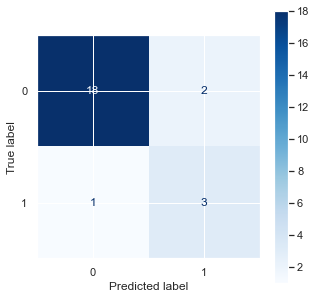

In [44]:
# Gráfico no normalizado de la martiz de confusión

disp = plot_confusion_matrix(modelo_final, X_prueba_sc, y_target,
                                 cmap=plt.cm.Blues, values_format = '')

### ROC

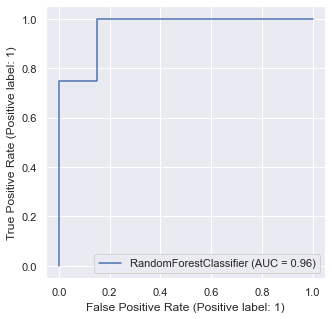

In [45]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc

plot_roc_curve(modelo_final, X_prueba_sc, y_target)
auc = roc_auc_score(y_target, y_predict_prueba)

### MCC

In [46]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_target, y_predict_prueba)

0.5964809080634605